In [77]:
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import networkx as nx
import matplotlib.image as mpimg

In [78]:
groceries = pd.read_csv('groceries.txt', sep='\t', header = None)

In [79]:
groceries.columns = ["Items Purchased"]

In [80]:
groceries.head()

,Items Purchased
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


## Process for creating dummy variables for all items that were found in at least one grocery basket

In [82]:
# Split the 'Items' column by commas
groceries['Items_split'] = groceries['Items Purchased'].str.split(',')

# Create dummy variables for each item
groceries_dummies = groceries['Items_split'].str.join('|').str.get_dummies()

# Join to original data frame
groceries_final = groceries.drop(columns=['Items_split']).join(groceries_dummies)

# Drop the items purchased column
groceries_final = groceries_final.drop(columns=['Items Purchased'])

## Plot histogram of most frequently purchased items

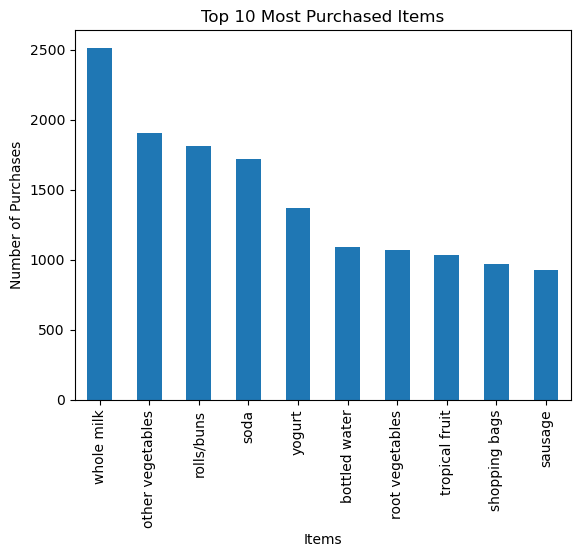

In [84]:
purchase_counts = groceries_final.sum()

top_10_items = purchase_counts.nlargest(10)

top_10_items.plot(kind='bar')
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Items')
plt.ylabel('Number of Purchases')
plt.show()

## Create Association Rules

In [86]:
frequent_itemsets = apriori(groceries_final, min_support=0.005, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.head()

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(UHT-milk),0.110524,0.033452,0.007321,0.066237,1.980074,0.003624,1.035111,0.556472
1,(UHT-milk),(bottled water),0.033452,0.110524,0.007321,0.218845,1.980074,0.003624,1.138668,0.512099
2,(other vegetables),(UHT-milk),0.193493,0.033452,0.008134,0.042039,1.256694,0.001662,1.008964,0.253267
3,(UHT-milk),(other vegetables),0.033452,0.193493,0.008134,0.243161,1.256694,0.001662,1.065626,0.211331
4,(rolls/buns),(UHT-milk),0.183935,0.033452,0.006406,0.034826,1.041071,0.000253,1.001423,0.048343


## Sort Values By Support

In [88]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
953,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
952,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
1062,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696,0.208496
1063,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452,0.228543
1198,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
1199,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157,0.488608
1085,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401,0.483202
1084,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913,0.578298
923,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
922,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941,0.688008


## Plot Support vs Confidence

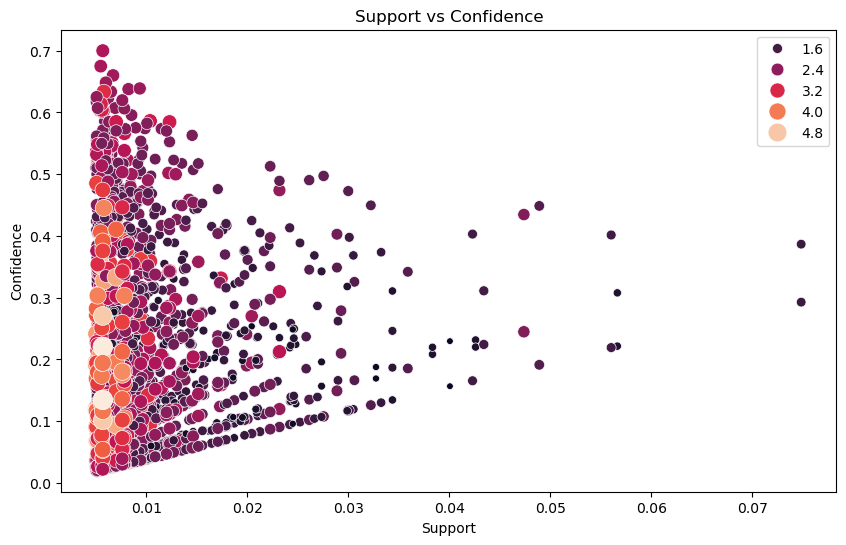

In [90]:
# Plotting support vs confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='rocket', sizes=(20, 200))
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='best')
plt.show()

## Plot Support vs Lift

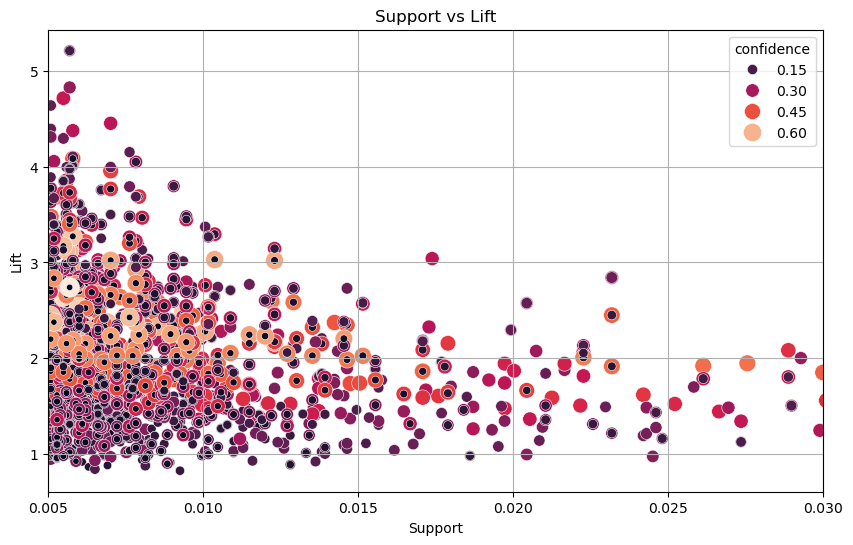

In [92]:
# Plot Support vs Lift
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='lift', size='confidence', hue='confidence', data=rules, palette='rocket', sizes=(20, 200))
plt.xlabel('Support')
plt.ylabel('Lift')
plt.xlim(.005, .03)
plt.title('Support vs Lift')
plt.grid(True)
plt.show()

## Lift vs Confidence

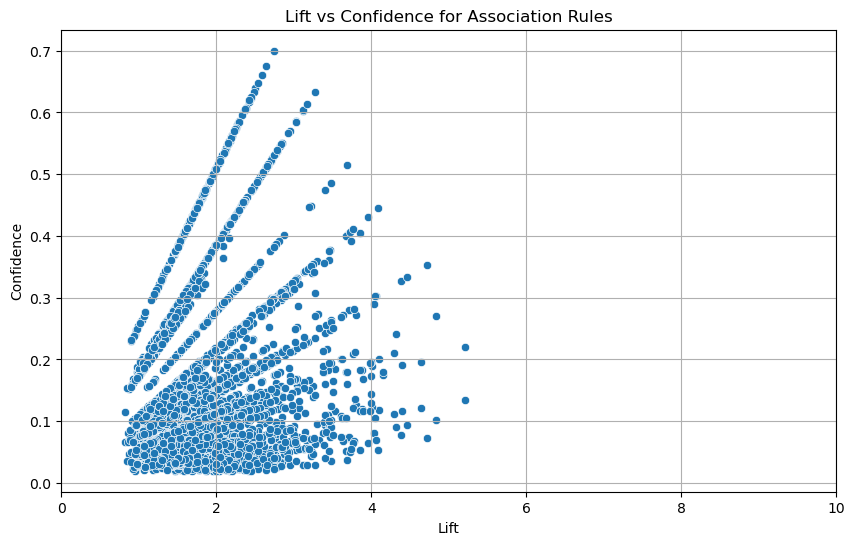

In [94]:
# Plot Lift vs Confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lift', y='confidence', data=rules)
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.xlim(0, 10)
plt.title('Lift vs Confidence for Association Rules')
plt.grid(True)
plt.show()

## Rules with High Confidence

In [96]:
high_confidence = rules[(rules['confidence'] > .5)]
high_confidence.sort_values(["confidence","lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2940,"(yogurt, root vegetables, tropical fruit)",(whole milk),0.008134,0.255516,0.005694,0.700000,2.739554,0.003616,2.481613,0.640185
2815,"(pip fruit, other vegetables, root vegetables)",(whole milk),0.008134,0.255516,0.005491,0.675000,2.641713,0.003412,2.290720,0.626554
1520,"(butter, whipped/sour cream)",(whole milk),0.010168,0.255516,0.006711,0.660000,2.583008,0.004113,2.189659,0.619150
2516,"(pip fruit, whipped/sour cream)",(whole milk),0.009253,0.255516,0.005999,0.648352,2.537421,0.003635,2.117126,0.611558
1525,"(yogurt, butter)",(whole milk),0.014642,0.255516,0.009354,0.638889,2.500387,0.005613,2.061648,0.608978
1508,"(butter, root vegetables)",(whole milk),0.012913,0.255516,0.008236,0.637795,2.496107,0.004936,2.055423,0.607217
1742,"(curd, tropical fruit)",(whole milk),0.010269,0.255516,0.006507,0.633663,2.479936,0.003883,2.032240,0.602956
2786,"(whole milk, root vegetables, citrus fruit)",(other vegetables),0.009151,0.193493,0.005796,0.633333,3.273165,0.004025,2.199566,0.700899
2828,"(yogurt, pip fruit, other vegetables)",(whole milk),0.008134,0.255516,0.005084,0.625000,2.446031,0.003005,1.985291,0.596023
1808,"(pip fruit, domestic eggs)",(whole milk),0.008643,0.255516,0.005389,0.623529,2.440275,0.003181,1.977536,0.595356


## Rules with High Confidence

In [98]:
high_lift = rules[(rules['lift'] > 1)]
high_lift.sort_values(["lift", "confidence"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2946,"(whole milk, tropical fruit)","(yogurt, root vegetables)",0.042298,0.025826,0.005694,0.134615,5.212371,0.004602,1.125712,0.843841
2943,"(yogurt, root vegetables)","(whole milk, tropical fruit)",0.025826,0.042298,0.005694,0.220472,5.212371,0.004602,1.228567,0.829573
2947,"(root vegetables, tropical fruit)","(yogurt, whole milk)",0.021047,0.056024,0.005694,0.270531,4.828814,0.004515,1.294059,0.809957
2942,"(yogurt, whole milk)","(root vegetables, tropical fruit)",0.056024,0.021047,0.005694,0.101633,4.828814,0.004515,1.089703,0.839969
2821,"(pip fruit, root vegetables)","(whole milk, other vegetables)",0.015557,0.074835,0.005491,0.352941,4.716272,0.004326,1.429801,0.800420
2816,"(whole milk, other vegetables)","(pip fruit, root vegetables)",0.074835,0.015557,0.005491,0.073370,4.716272,0.004326,1.062390,0.851705
695,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407,0.805441
694,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,0.003988,1.107758,0.818949
2877,"(root vegetables, tropical fruit)","(whole milk, other vegetables)",0.021047,0.074835,0.007016,0.333333,4.454257,0.005441,1.387748,0.792169
2872,"(whole milk, other vegetables)","(root vegetables, tropical fruit)",0.074835,0.021047,0.007016,0.093750,4.454257,0.005441,1.080224,0.838224


## Graph

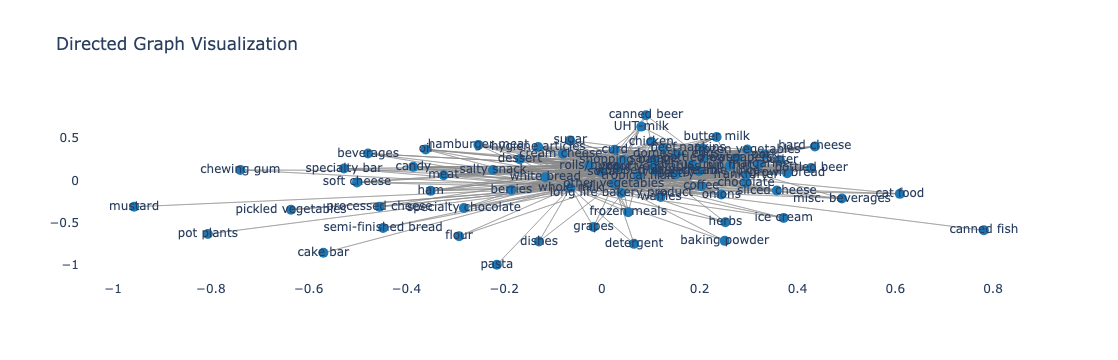

In [99]:
# Initialize a directed graph using all rules
G = nx.DiGraph()

# Add nodes and edges
for _, row in rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, lift=row['lift'], confidence=row['confidence'])

# Define node and edge attributes
pos = nx.spring_layout(G, seed=42)  # Positions for all nodes
edge_labels = nx.get_edge_attributes(G, 'weight')
confidence_labels = nx.get_edge_attributes(G, 'confidence')

# Extract node positions
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(size=10, color='#1f78b4'))

edge_label_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='text',
    textposition='middle center',
    showlegend=False,
    hoverinfo='none')

# Add edges and edge labels
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)
    

# Add nodes
for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (node,)

# Create Plotly figure
fig = go.Figure()

# Add edge and node traces
fig.add_trace(edge_trace)
fig.add_trace(node_trace)
fig.add_trace(edge_label_trace)

# Update layout
fig.update_layout(
    title='Directed Graph Visualization',
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    plot_bgcolor='white'
)

In [100]:
# Export Graph 
nx.write_gexf(G, 'full_graph.gexf')

## High Lift Graph

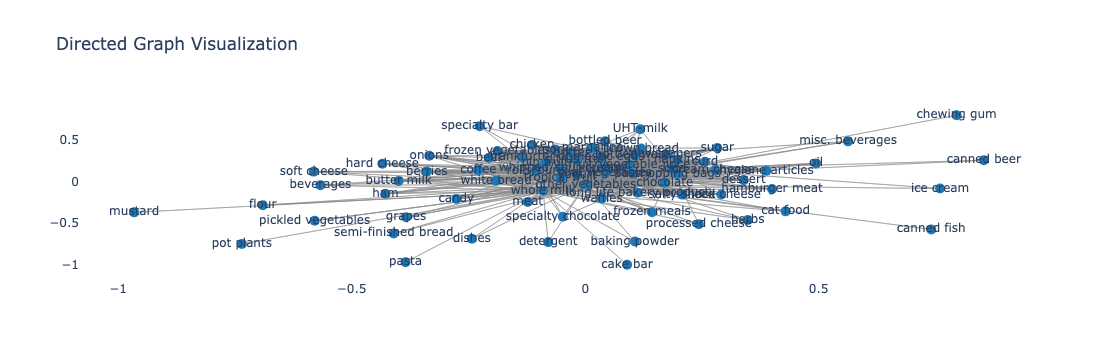

In [102]:
# Initialize a directed graph high lift
H = nx.DiGraph()

# Add nodes and edges
for _, row in high_lift.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    for antecedent in antecedents:
        for consequent in consequents:
            H.add_edge(antecedent, consequent, lift=row['lift'], confidence=row['confidence'])

# Define node and edge attributes
pos = nx.spring_layout(H, seed=42)  # Positions for all nodes
edge_labels = nx.get_edge_attributes(G, 'weight')
confidence_labels = nx.get_edge_attributes(G, 'confidence')

# Extract node positions
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(size=10, color='#1f78b4'))

edge_label_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='text',
    textposition='middle center',
    showlegend=False,
    hoverinfo='none')

# Add edges and edge labels
for edge in H.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)
    

# Add nodes
for node in H.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (node,)

# Create Plotly figure
fig = go.Figure()

# Add edge and node traces
fig.add_trace(edge_trace)
fig.add_trace(node_trace)
fig.add_trace(edge_label_trace)

# Update layout
fig.update_layout(
    title='Directed Graph Visualization',
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    plot_bgcolor='white'
)

In [103]:
# Export Graph 
nx.write_gexf(H, 'high_lift.gexf')

## High Confidence

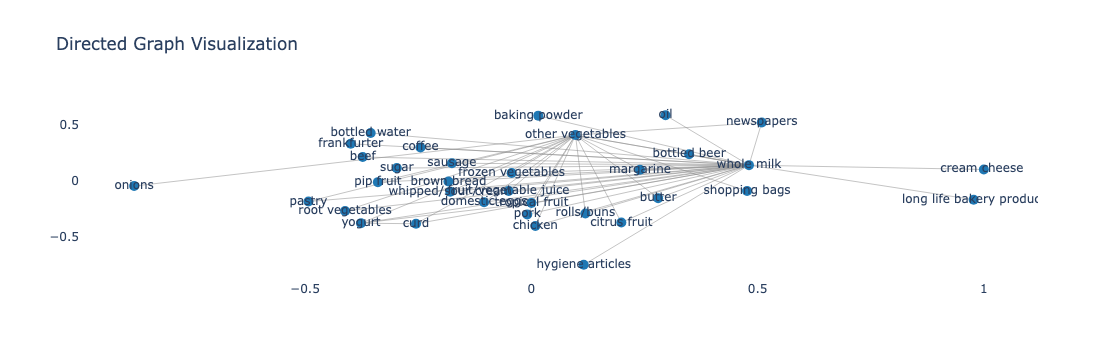

In [105]:
# Initialize a directed graph using all rules
J = nx.DiGraph()

# Add nodes and edges
for _, row in high_confidence.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    for antecedent in antecedents:
        for consequent in consequents:
            J.add_edge(antecedent, consequent, lift=row['lift'], confidence=row['confidence'])

# Define node and edge attributes
pos = nx.spring_layout(J, seed=42)  # Positions for all nodes
edge_labels = nx.get_edge_attributes(G, 'weight')
confidence_labels = nx.get_edge_attributes(G, 'confidence')

# Extract node positions
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(size=10, color='#1f78b4'))

edge_label_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='text',
    textposition='middle center',
    showlegend=False,
    hoverinfo='none')

# Add edges and edge labels
for edge in J.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)
    

# Add nodes
for node in J.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (node,)

# Create Plotly figure
fig = go.Figure()

# Add edge and node traces
fig.add_trace(edge_trace)
fig.add_trace(node_trace)
fig.add_trace(edge_label_trace)

# Update layout
fig.update_layout(
    title='Directed Graph Visualization',
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    plot_bgcolor='white'
)

In [106]:
# Export Graph 
nx.write_gexf(G, 'high_confidence.gexf')